# AVALIAÇÃO 3
exercício 4

## Exercício 4
Implementar o PCA

3.1) Adiciona o objeto PCA ao sub package decomposition .
Deves criar um módulo chamado pca. py para implementar este objeto

3.2) Considera a estrutura do objeto PCA apresentada no diapositivo seguinte.

▪Técnica de álgebra linear para reduzir as dimensões do dataset. O PCA a implementar usa a técnica de álgebra linear SVD (Singular Value Decomposition)
▪ class PCA:
    • Parâmetros:
        - n_components – número de componentes
    • Parâmetros estimados:
        - mean – média das amostras
        - components – os componentes principais aka matriz unitária dos eigenvectors
        - explained_variance – a variância explicada aka matriz diagonal dos eigenvalues
    • Métodos:
        - fit – estima a média, os componentes e a variância explicada
        - transform – calcula o dataset reduzido usando os componentes principais.

3.3) Podes testar o objeto PCA num jupyter notebook usando o dataset iris.csv (classificação)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from si.data.dataset import Dataset
from si.io.csv import read_csv
from si.decomposition.pca import PCA

## Exemplos de como utilizar os objectos de agrupamento

## PCA

In [2]:
iris = read_csv("C:/Users/Carolina/Documents/GitHub/si/datasets/iris.csv", sep=',',features=True, label=True)

print(iris.X[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [3]:
n = 2
iris_pca = PCA(n)
iris_xreduced = iris_pca.fit_transform(iris)
iris_pca.components


array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647]])

In [4]:
iris_pca.explained_variance

array([4.22484077, 0.24224357])

In [5]:
iris_pca.mean

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

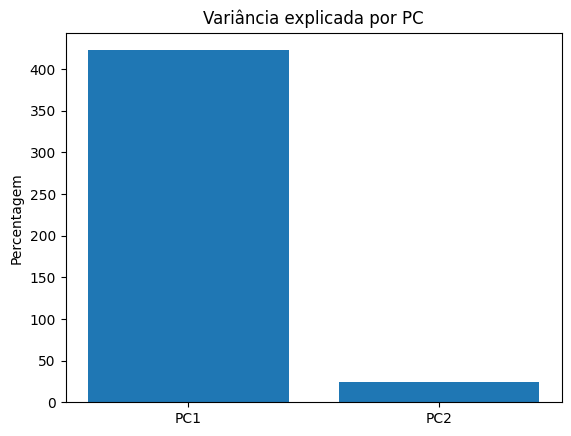

In [6]:
plt.bar(range(n), iris_pca.explained_variance*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

## kmeans

In [7]:
iris_dataset = read_csv("C:/Users/Carolina/Documents/GitHub/si/datasets/iris.csv", sep=',',features=True, label=True)

In [8]:
# imports
import matplotlib.pylab as plt
import numpy as np
from si.io.csv import read_csv
from si.clustering.kmeans import KMeans

In [9]:
# kmeans
k = 4
kmeans = KMeans(k)
distances = kmeans.fit_transform(iris_dataset)
distances

array([[4.55531352, 0.25166115, 2.82210004, 0.68707447],
       [4.63161756, 0.53229065, 2.82465293, 0.35880078],
       [4.79352493, 0.38729833, 2.99078052, 0.48936565],
       [4.67705904, 0.53851648, 2.85353994, 0.32806537],
       [4.60020448, 0.19148542, 2.86960593, 0.72841599],
       [4.16315761, 0.73711148, 2.54483726, 1.09925776],
       [4.72444507, 0.31091264, 2.93549072, 0.54961016],
       [4.50465107, 0.25166115, 2.74362814, 0.52337671],
       [4.86301154, 0.79372539, 3.0207876 , 0.52195948],
       [4.58239907, 0.49328829, 2.77990737, 0.34672681],
       [4.38279377, 0.58022984, 2.72255405, 0.96964915],
       [4.50598283, 0.31091264, 2.72417542, 0.44078742],
       [4.71034832, 0.56862407, 2.89513058, 0.3866248 ],
       [5.18067382, 0.84656167, 3.3474106 , 0.81595039],
       [4.58016171, 1.05356538, 3.0517339 , 1.52565621],
       [4.35555751, 1.21518174, 2.90567546, 1.69471866],
       [4.51086258, 0.65064071, 2.89439033, 1.17608777],
       [4.51922352, 0.2236068 ,

In [10]:
predictions = kmeans.predict(iris_dataset)
predictions

array([1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1,
       1, 3, 1, 3, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

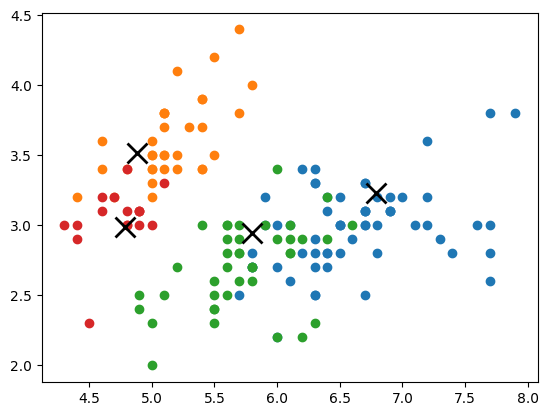

In [11]:
# plotting
for i in range(k):
    k_sample = iris_dataset.X[np.where(predictions == i)]
    plt.plot(k_sample[:, 0], k_sample[:, 1], 'o')
    lines = plt.plot(kmeans.centroids[i, 0], kmeans.centroids[i, 1], 'kx')
    plt.setp(lines, ms=15.0)
    plt.setp(lines, mew=2.0)

plt.show()